In [30]:
import os
#os.environ[] 環境変数の取得
os.environ['KERAS_BACKEND'] = "tensorflow"
kerasBKED= os.environ["KERAS_BACKEND"]
print(kerasBKED)

tensorflow


In [31]:
os.chdir("C:\\Users\\tomohiko\\Autoencoder")

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import pickle
import numpy as np

In [32]:
#Cifar10を読み込む
batch_size = 32
num_clases=10
epochs = 5
saveDir = "C:\\Users\\tomohiko\\Zundamondetector\\TESTTESTimages3"
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)
    print("Dirをつくりました")

In [4]:
#画像の水増しを使っての実験
#画像を一気に読み取る
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import  ImageDataGenerator
%matplotlib inline

files =  glob.glob("C:\\Users\\tomohiko\\Autoencoder\\YahooZunda\\zundamon\\*")
#print(files[0])
#print(len[files])

xnum = len(files)

fig = plt
fig = plt.figure(figsize= (1,xnum))
ass = []

datagen = image.ImageDataGenerator(rotation_range=90)

#画像読み取り用
imgs = []
print(len(files))

for i, file in enumerate(files):
    print(file)
    #ass.append(fig.add_subplot(1+i,1,i+1))
    tempimage=Image.open(file)
    tempimage = tempimage.resize((128, 128))  # 画像をリサイズする
    tempimagearray = np.array(tempimage)
    
    # 形状が(128, 128,3)でない場合はスキップする
    if tempimagearray.shape !=(128,128,3):
        print("画像の形がいびつです" , file)
        continue
    
    
    tempimagecv2= cv2.cvtColor(tempimagearray,cv2.COLOR_BGR2RGB)
    print(tempimagecv2.shape)
    imgs.append(tempimagearray)
    
    #水増し用の部分
    x = tempimagearray[np.newaxis]
    gen = datagen.flow(x,batch_size=1)
    
    for i in range(2):
        imgs.append(next(gen)[0])
    #上下反転したものを加える
    flippedud_img = np.flipud(tempimagearray)
    imgs.append(flippedud_img)
    #左右反転したものを加える
    flippedlr_img = np.fliplr(tempimagearray)
    imgs.append(flippedlr_img)
    
    
    
   
    
    #plt.imshow(tempimagearray)
   # testimga = np.array(testimg)
#testimga = cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)

imgs = np.array(imgs)
#print(type(imgs[0]))
#print(imgs.shape)
#imgs = imgs.astype('float32')
plt.show()
    

410
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_1.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_101.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_103.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_104.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_105.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_107.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_109.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_11.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_110.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_111.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_112.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_113.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_115.jpg

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_218.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_22.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_220.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_221.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_223.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_225.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_23.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_230.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_233.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_234.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_236.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_237.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずん

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_354.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_356.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_357.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_358.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_359.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_36.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_360.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_364.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_365.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_366.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_367.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_368.jpg
画像の形がいびつです C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだも

C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_508.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_509.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_51.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_511.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_512.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_513.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_514.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_515.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_516.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_517.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_518.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_52.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_520.jpg
(1

<Figure size 100x41000 with 0 Axes>

In [5]:
print(len(imgs))
print(type(imgs[0]))
print(imgs[0].shape)

1945
<class 'numpy.ndarray'>
(128, 128, 3)


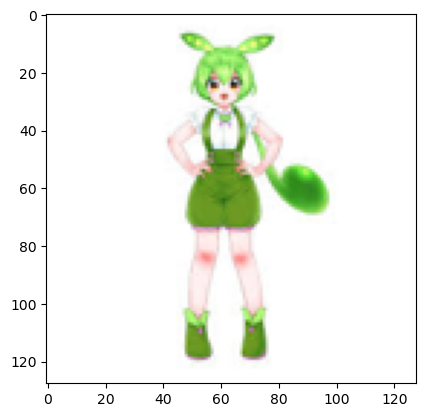

In [6]:
plt.imshow(imgs[0].astype('uint8'))
plt.show()

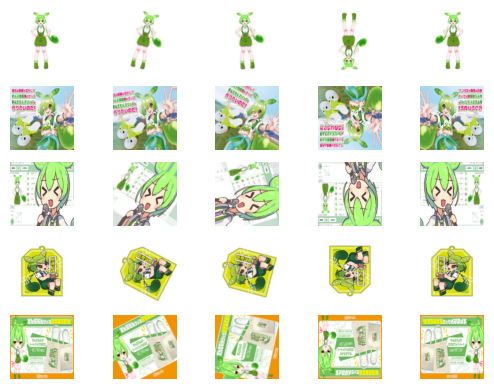

In [7]:
#画像を確認する
for j in range(25):
    plt.subplot(5,5,j+1)
    plt.imshow(imgs[j].astype('uint8'))
    #cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)
    #plt.imshow(imgs[j])
    plt.axis('off')
plt.show()

In [8]:
#ここからオートエンコーダーを用いる
#旧ver、ミスアリ
input_img = Input(shape=(128, 128, 3))
x = Conv2D(256, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)#BatchNormalization()勾配消失、爆発を防ぐ
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
#x = Conv2D(32, (3, 3), padding='same')(x)
#x = BatchNormalization()(x)
#x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)

In [9]:
#ここからオートエンコーダーを用いる
#修正版、修正箇所、デコーダの5行目の()をencodedからxに変更、
#maxpooring、UpSampling2Dを適当な個所に追加
input_img = Input(shape=(128, 128, 3))
x = Conv2D(256, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)#BatchNormalization()勾配消失、爆発を防ぐ
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(32, (3, 3), padding='same')(x)
#x = BatchNormalization()(x)
#x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

#x = Conv2D(32, (3, 3), padding='same')(encoded)
#x = BatchNormalization()(x)
#x = Activation('relu')(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)

In [10]:
model=Model(input_img,decoded)
#最適化関数を調整する
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,loss='mse')#学習率の変更を行う

In [11]:
#なんかセーブする所(一旦虫)
es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
chkpt = saveDir + 'AutoEncoder_Cifar10_Deep_weights.{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [12]:
#モデルをつくる(エポッチ数を5とする)
history = model.fit(imgs[:1361], imgs[:1361],
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_data=(imgs[1361:1754], imgs[1361:1754]),
                    #callbacks=[es_cb, cp_cb],
                    shuffle=True)

Epoch 1/5
69/69 [==============================] - 373s 5s/step - loss: 35758.5352 - val_loss: 32080.4805
Epoch 2/5
69/69 [==============================] - 362s 5s/step - loss: 35748.5664 - val_loss: 32088.1348
Epoch 3/5
69/69 [==============================] - 368s 5s/step - loss: 35741.2109 - val_loss: 32091.5820
Epoch 4/5
69/69 [==============================] - 383s 6s/step - loss: 35734.4062 - val_loss: 32090.5820
Epoch 5/5
69/69 [==============================] - 393s 6s/step - loss: 35728.3281 - val_loss: 32086.6836


In [13]:
score2 = model.evaluate(imgs[1754:1945],imgs[1754:1945],verbose=1)
print(score2)

6/6 [==============================] - 9s 1s/step - loss: 40176.5742
40176.57421875


In [14]:
model.save("C:\\Users\\tomohiko\\Zundamondetector\\zuntamonmizumashi5epoch2")

INFO:tensorflow:Assets written to: C:\Users\tomohiko\Zundamondetector\zuntamonmizumashi5epoch\assets


INFO:tensorflow:Assets written to: C:\Users\tomohiko\Zundamondetector\zuntamonmizumashi5epoch\assets


In [15]:
loadmodel = load_model("C:\\Users\\tomohiko\\Zundamondetector\\zuntamonmizumashi5epoch2")

1/1 [==============================] - 0s 105ms/step


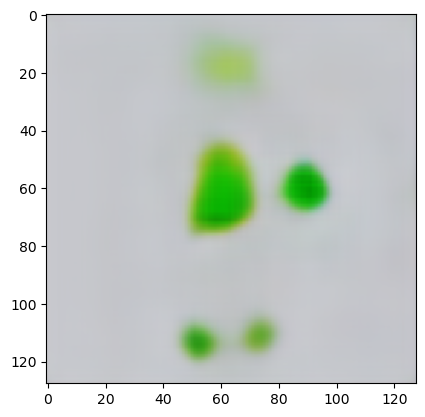

In [17]:
ttt =  loadmodel.predict(imgs[0:1])
plt.imshow(ttt[0])

In [18]:
#背景の読み取り
#その他の画像でもやってみる

#画像を一気に読み取る
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2

files =  glob.glob("C:\\Users\\tomohiko\\Autoencoder\\YahooZunda\\background\\*")
#print(files[0])
#print(len[files])

xnum = len(files)

fig = plt
fig = plt.figure(figsize= (1,xnum))
ass = []
#画像読み取り用
haikeiimg = []
print(len(files))

for i, file in enumerate(files):
    print(file)
    #ass.append(fig.add_subplot(1+i,1,i+1))
    tempimage=Image.open(file)
    tempimage = tempimage.resize((128, 128))  # 画像をリサイズする
    tempimagearray = np.array(tempimage)
    
    # 形状が(128, 128,3)でない場合はスキップする
    if tempimagearray.shape !=(128,128,3):
        print("画像の形がいびつです" , file)
        continue
    
    
    tempimagecv2= cv2.cvtColor(tempimagearray,cv2.COLOR_BGR2RGB)
    print(tempimagecv2.shape)
    haikeiimg.append(tempimagearray)
    
   
    
    #plt.imshow(tempimagearray)
   # testimga = np.array(testimg)
#testimga = cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)

haikeiimg = np.array(haikeiimg)
#print(type(imgs[0]))
#print(imgs.shape)
#imgs = imgs.astype('float32')
plt.show()
    

460
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_0.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_1.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_10.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_100.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_101.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_102.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_103.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_104.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_105.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_106.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_107.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_108.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_32.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_320.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_321.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_322.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_323.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_324.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_325.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_326.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_329.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_33.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_332.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_333.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencode

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_437.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_439.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_44.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_441.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_442.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_445.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_446.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_447.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_448.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_449.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_45.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_450.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencode

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_66.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_68.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_69.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_7.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_70.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_71.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_72.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_73.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_74.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_75.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_76.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_77.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZund

<Figure size 100x46000 with 0 Axes>

In [19]:
#人物の画像で実験を行う

#画像を一気に読み取る
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2

files =  glob.glob("C:\\Users\\tomohiko\\Autoencoder\\YahooZunda\\human\\*")
#print(files[0])
#print(len[files])

xnum = len(files)

fig = plt
fig = plt.figure(figsize= (1,xnum))
ass = []
#画像読み取り用
humanrimg = []
print(len(files))

for i, file in enumerate(files):
    print(file)
    #ass.append(fig.add_subplot(1+i,1,i+1))
    tempimage=Image.open(file)
    tempimage = tempimage.resize((128, 128))  # 画像をリサイズする
    tempimagearray = np.array(tempimage)
    
    # 形状が(128, 128,3)でない場合はスキップする
    if tempimagearray.shape !=(128,128,3):
        print("画像の形がいびつです" , file)
        continue
    
    
    tempimagecv2= cv2.cvtColor(tempimagearray,cv2.COLOR_BGR2RGB)
    print(tempimagecv2.shape)
    humanrimg.append(tempimagearray)
    
   
    
    #plt.imshow(tempimagearray)
   # testimga = np.array(testimg)
#testimga = cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)

humanrimg = np.array(humanrimg)
#print(type(imgs[0]))
#print(imgs.shape)
#imgs = imgs.astype('float32')
plt.show()

437
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_1.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_10.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_100.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_101.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_102.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_103.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_104.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_105.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_106.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_107.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_108.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_109.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_11.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoenc

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_203.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_204.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_205.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_206.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_207.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_21.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_210.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_211.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_212.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_213.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_214.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_215.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_216.jpg
(128, 128, 3)
C:\Users\tom

画像の形がいびつです C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_318.jpg
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_319.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_32.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_320.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_321.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_323.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_324.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_325.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_326.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_327.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_328.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_329.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_33.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_474.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_475.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_477.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_48.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_480.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_482.jpg
画像の形がいびつです C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_482.jpg
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_483.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_485.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_488.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_49.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_491.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_492.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\

<Figure size 100x43700 with 0 Axes>

In [20]:
#アニメの絵で実験を行う
#人物の画像で実験を行う

#画像を一気に読み取る
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2

files =  glob.glob("C:\\Users\\tomohiko\\Autoencoder\\YahooZunda\\anime\\*")
#print(files[0])
#print(len[files])

xnum = len(files)

fig = plt
fig = plt.figure(figsize= (1,xnum))
ass = []
#画像読み取り用
animeimg = []
print(len(files))

for i, file in enumerate(files):
    print(file)
    #ass.append(fig.add_subplot(1+i,1,i+1))
    tempimage=Image.open(file)
    tempimage = tempimage.resize((128, 128))  # 画像をリサイズする
    tempimagearray = np.array(tempimage)
    
    # 形状が(128, 128,3)でない場合はスキップする
    if tempimagearray.shape !=(128,128,3):
        print("画像の形がいびつです" , file)
        continue
    
    
    tempimagecv2= cv2.cvtColor(tempimagearray,cv2.COLOR_BGR2RGB)
    print(tempimagecv2.shape)
    animeimg.append(tempimagearray)
    
   
    
    #plt.imshow(tempimagearray)
   # testimga = np.array(testimg)
#testimga = cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)

animeimg = np.array(animeimg)
#print(type(imgs[0]))
#print(imgs.shape)
#imgs = imgs.astype('float32')
plt.show()

676
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_1.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_10.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_100.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_101.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_102.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_103.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_104.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_105.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_106.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_107.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_108.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_109.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_11.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_287.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_288.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_289.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_29.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_290.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_291.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_292.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_293.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_294.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_295.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_296.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_297.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_298.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZun

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_48.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_480.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_481.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_482.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_483.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_484.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_485.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_486.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_487.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_488.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_489.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_49.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_490.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZund

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_65.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_650.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_651.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_652.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_653.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_654.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_655.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_656.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_657.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_658.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_659.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_66.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_660.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZund

<Figure size 100x67600 with 0 Axes>

1/1 [==============================] - 0s 290ms/step


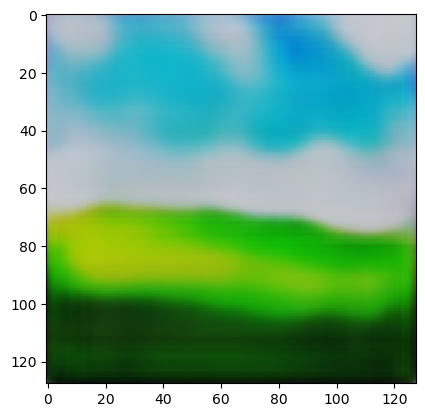

In [21]:
#背景の画像を作ってみる
ttt =  loadmodel.predict(haikeiimg[0:1])
plt.imshow(ttt[0])

In [22]:
#各スコアを確認し始める
#ずんだもん
#複数の画像を入れて、配列をcsvに保存する
zunscores = []
for i in range(1754,1945,1):
    sco = model.evaluate(imgs[i:i+1],imgs[i:i+1],verbose=1)
    zunscores.append(sco)

score3 = model.evaluate(imgs[1754:1945],imgs[1754:1945],verbose=1)
print(score3)

1/1 [==============================] - 0s 74ms/step - loss: 49509.7891


6/6 [==============================] - 9s 2s/step - loss: 40176.5742
40176.57421875


In [23]:
#配列を保存する
zunscore2 = np.array(zunscores)
np.save("C:\\Users\\tomohiko\\Zundamondetector\\zunscores5epoch.npy",zunscore2)

In [24]:
#配列を読み込む
loadzun = np.load("C:\\Users\\tomohiko\\Zundamondetector\\zunscores5epoch.npy")
print(len(loadzun))
print(loadzun[0])

191
37164.46875


In [25]:
#平均　分散を求める
import statistics
import math
zundaave = statistics.mean(zunscore2)
zundastatistics = statistics.pvariance(zunscore2)#母数は190
print(zundaave)
print(zundastatistics)

40176.57677008344
127661624.8832638


In [26]:
#背景
#背景のものを読み込む
#複数の画像を入れて、配列をcsvに保存する
haikeiscores = []
for i in range(0,201,1):
    sco = model.evaluate(haikeiimg[i:i+1],haikeiimg[i:i+1],verbose=1)
    haikeiscores.append(sco)

score3 = model.evaluate(haikeiimg[0:1],haikeiimg[0:1],verbose=1)
print(score3)

#配列を保存する
haikeiscores = np.array(haikeiscores)
np.save("C:\\Users\\tomohiko\\Zundamondetector\\haikeiscore5epoch.npy",haikeiscores)


#平均　分散を求める
import statistics
import math
haikeiave = statistics.mean(haikeiscores)
haikeistatistics = statistics.pvariance(haikeiscores)#母数は190
print(haikeiave)
print(haikeistatistics)

1/1 [==============================] - 0s 88ms/step - loss: 18606.3555


1/1 [==============================] - 0s 66ms/step - loss: 25232.8711
25232.87109375
18955.074476251553
79929562.46443005


In [27]:
#結果をCCSVに保存する
#背景のものを読み込む
#複数の画像を入れて、配列をcsvに保存する
humanscores = []
for i in range(0,201,1):
    sco = model.evaluate(humanrimg[i:i+1],humanrimg[i:i+1],verbose=1)
    humanscores.append(sco)

score3 = model.evaluate(humanrimg[0:1],humanrimg[0:1],verbose=1)
print(score3)

#配列を保存する
humanscores = np.array(humanscores)
np.save("C:\\Users\\tomohiko\\Zundamondetector\\humanscores5epoch.npy",humanscores)


#平均　分散を求める
import statistics
import math
humanave = statistics.mean(humanscores)
humanstatistics = statistics.pvariance(humanscores)#母数は190
print(humanave)
print(humanstatistics)

1/1 [==============================] - 0s 66ms/step - loss: 32391.2109


1/1 [==============================] - 0s 73ms/step - loss: 20127.4766
20127.4765625
27771.453508823073
157898496.8424043


In [28]:
#結果をCCSVに保存するアニメ絵
#背景のものを読み込む
#複数の画像を入れて、配列をcsvに保存する
animescores = []
for i in range(0,201,1):
    sco = model.evaluate(animeimg[i:i+1],animeimg[i:i+1],verbose=1)
    animescores.append(sco)

score3 = model.evaluate(animeimg[0:1],animeimg[0:1],verbose=1)
print(score3)

#配列を保存する
animescores = np.array(animescores)
np.save("C:\\Users\\tomohiko\\Zundamondetector\\animescores5epoch.npy",animescores)


#平均　分散を求める
import statistics
import math
animeave = statistics.mean(animescores)
animestatistics = statistics.pvariance(animescores)#母数は190
print(animeave)
print(animestatistics)

1/1 [==============================] - 0s 66ms/step - loss: 29043.2227


1/1 [==============================] - 0s 70ms/step - loss: 21208.7988
21208.798828125
24346.583731731964
112148402.39996946


In [29]:
#各平均、分散を並べて表示させる
print("ずんだもん")
print(zundaave)
print(zundastatistics)
print("背景")
print(haikeiave)
print(haikeistatistics)
print("人物")
print(humanave)
print(humanstatistics)
print("アニメ絵")
print(animeave)
print(animestatistics)

ずんだもん
40176.57677008344
127661624.8832638
背景
18955.074476251553
79929562.46443005
人物
27771.453508823073
157898496.8424043
アニメ絵
24346.583731731964
112148402.39996946
